# EDA: Basic Statistics
Basic exploratory data analysis for OSAS detection dataset
- Patient count, recording durations
- Event counts per patient  
- Missing data heatmaps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Load Dataset

In [ ]:
# Load the dataset (assuming it's been preprocessed)
# If dataset_OSAS.pickle is available, load it directly

try:
    dataset = pd.read_pickle('./data/dataset_OSAS.pickle')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Please ensure dataset_OSAS.pickle is in the ./data/ directory")

print(f"Dataset shape: {dataset.shape}")
print(f"Columns: {list(dataset.columns)}")

Dataset loaded successfully!
Dataset shape: (961357, 18)
Columns: ['patient', 'timestamp_datetime', 'HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)', 'event', 'anomaly', 'signal_pleth', 'signal_ecg_i', 'signal_ecg_ii', 'signal_ecg_iii', 'PSG_Abdomen', 'PSG_Flow', 'PSG_Position', 'PSG_Snore', 'PSG_Thorax']


## 1. Patient Count and Recording Durations

In [3]:
# Basic patient statistics
n_patients = dataset['patient'].nunique()
total_records = len(dataset)

print(f"Total number of patients: {n_patients}")
print(f"Total number of records: {total_records:,}")
print(f"Average records per patient: {total_records/n_patients:.1f}")

Total number of patients: 30
Total number of records: 961,357
Average records per patient: 32045.2


Recording duration statistics (hours):
count    30.000000
mean      8.901454
std       1.469884
min       4.058333
25%       8.079028
50%       9.058056
75%       9.694861
max      11.910278
Name: duration_hours, dtype: float64


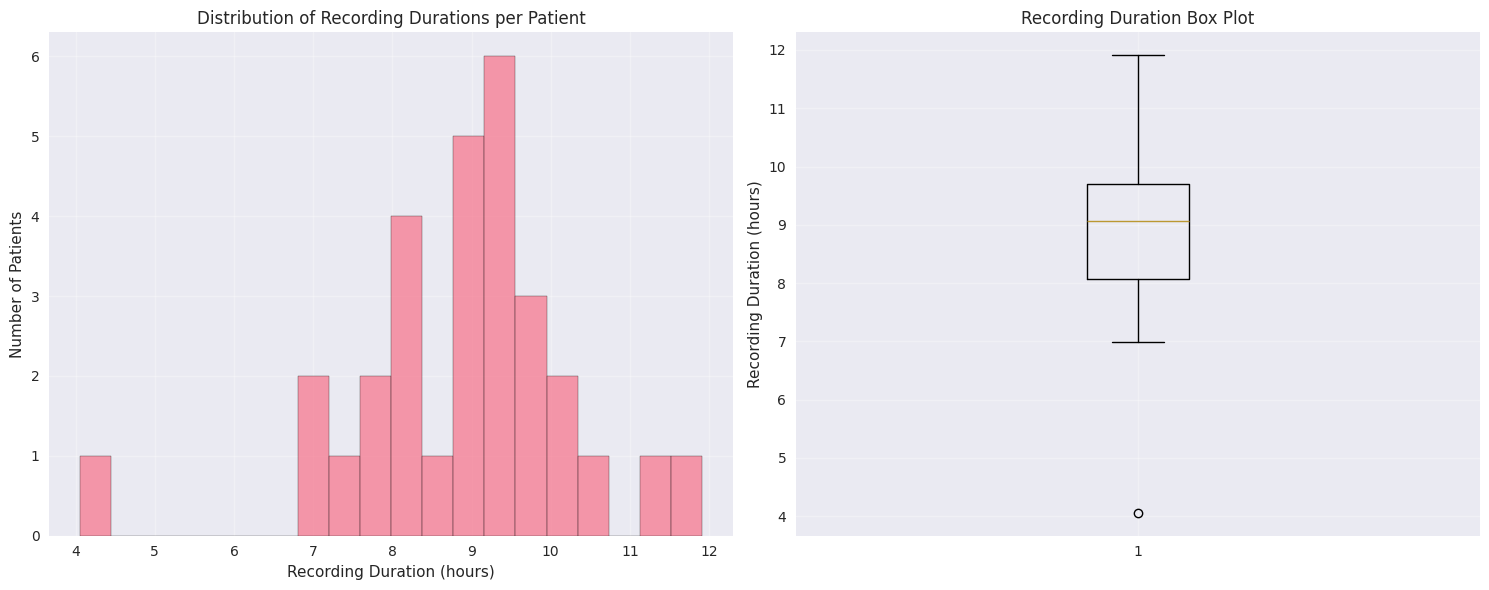

In [4]:
# Recording durations per patient
patient_durations = dataset.groupby('patient').size().reset_index(name='duration_seconds')
patient_durations['duration_hours'] = patient_durations['duration_seconds'] / 3600

print("Recording duration statistics (hours):")
print(patient_durations['duration_hours'].describe())

# Plot distribution of recording durations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of durations
axes[0].hist(patient_durations['duration_hours'], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Recording Duration (hours)')
axes[0].set_ylabel('Number of Patients')
axes[0].set_title('Distribution of Recording Durations per Patient')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(patient_durations['duration_hours'])
axes[1].set_ylabel('Recording Duration (hours)')
axes[1].set_title('Recording Duration Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Event Counts per Patient

In [5]:
# Event counts per patient
event_counts = dataset.groupby(['patient', 'event']).size().unstack(fill_value=0)
anomaly_counts = dataset.groupby(['patient', 'anomaly']).size().unstack(fill_value=0)

print("Event counts per patient (first 10 patients):")
print(event_counts.head(10))

print("\nAnomaly counts per patient (first 10 patients):")
print(anomaly_counts.head(10))

Event counts per patient (first 10 patients):
event    APNEA-CENTRAL  APNEA-MIXED  APNEA-OBSTRUCTIVE  HYPOPNEA   NONE
patient                                                                
1                  102          163               2548      3057  19308
10                1835         1450               1785      4601  31387
11                  43           25                166       518  29648
12                 342           36                  0       255  29513
13                  24            0                388      3872  29752
14                   0            0                234      2399  34287
15                 130          210               5749      4944  22072
16                1456         3798               3722      2107  21277
17                 115          160               1708      2701  24303
18                  11            0                499        94  35271

Anomaly counts per patient (first 10 patients):
anomaly  False  True 
patient            

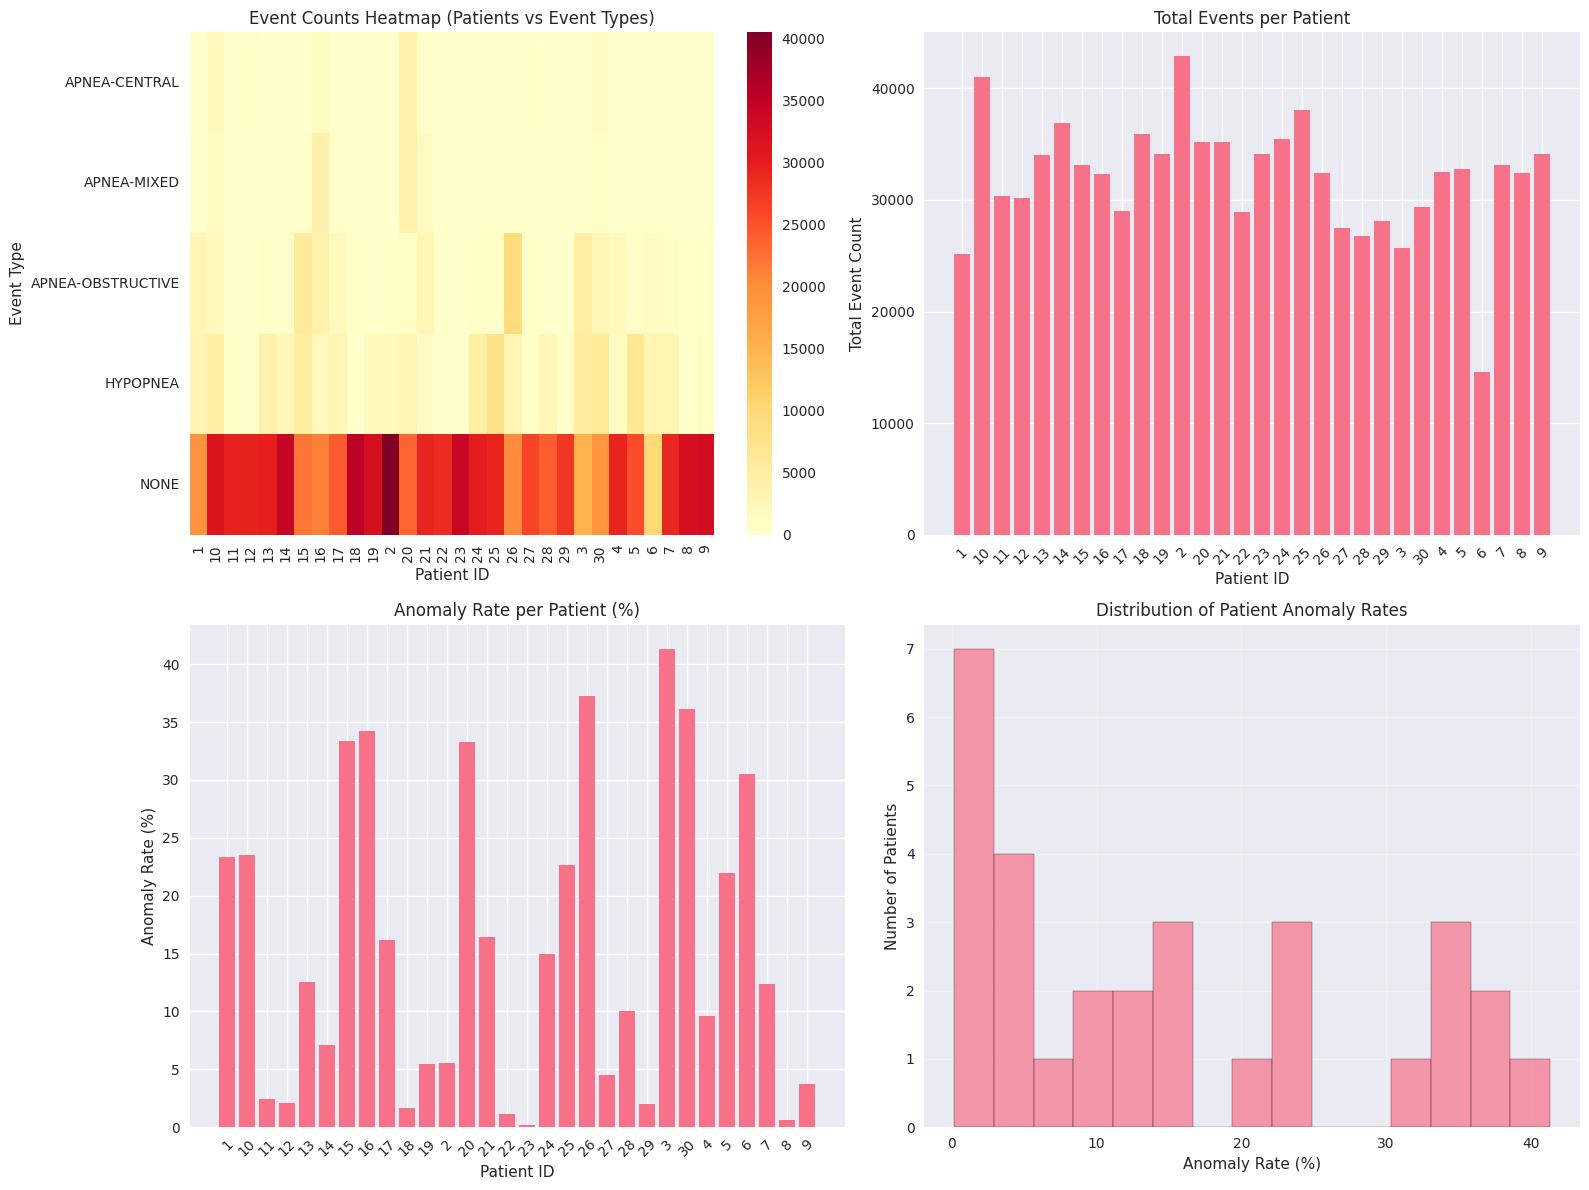

In [6]:
# Visualize event distribution across patients
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap of events per patient
sns.heatmap(event_counts.T, annot=False, cmap='YlOrRd', ax=axes[0,0])
axes[0,0].set_title('Event Counts Heatmap (Patients vs Event Types)')
axes[0,0].set_xlabel('Patient ID')
axes[0,0].set_ylabel('Event Type')

# Total events per patient
total_events_per_patient = event_counts.sum(axis=1)
axes[0,1].bar(total_events_per_patient.index, total_events_per_patient.values)
axes[0,1].set_title('Total Events per Patient')
axes[0,1].set_xlabel('Patient ID')
axes[0,1].set_ylabel('Total Event Count')
axes[0,1].tick_params(axis='x', rotation=45)

# Anomaly rate per patient
anomaly_rate = anomaly_counts[True] / (anomaly_counts[True] + anomaly_counts[False]) * 100
axes[1,0].bar(anomaly_rate.index, anomaly_rate.values)
axes[1,0].set_title('Anomaly Rate per Patient (%)')
axes[1,0].set_xlabel('Patient ID')
axes[1,0].set_ylabel('Anomaly Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Distribution of anomaly rates
axes[1,1].hist(anomaly_rate.values, bins=15, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribution of Patient Anomaly Rates')
axes[1,1].set_xlabel('Anomaly Rate (%)')
axes[1,1].set_ylabel('Number of Patients')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Missing Data Analysis

Missing Data Summary:
                    Missing Count  Missing Percentage
PI(%)                      133255           13.861136
SpO2(%)                    132580           13.790923
RR(rpm)                     18456            1.919786
HR(bpm)                      3544            0.368646
PVCs(/min)                   3544            0.368646
patient                         0            0.000000
timestamp_datetime              0            0.000000
event                           0            0.000000
anomaly                         0            0.000000
signal_pleth                    0            0.000000
signal_ecg_i                    0            0.000000
signal_ecg_ii                   0            0.000000
signal_ecg_iii                  0            0.000000
PSG_Abdomen                     0            0.000000
PSG_Flow                        0            0.000000
PSG_Position                    0            0.000000
PSG_Snore                       0            0.000000
PSG_Th

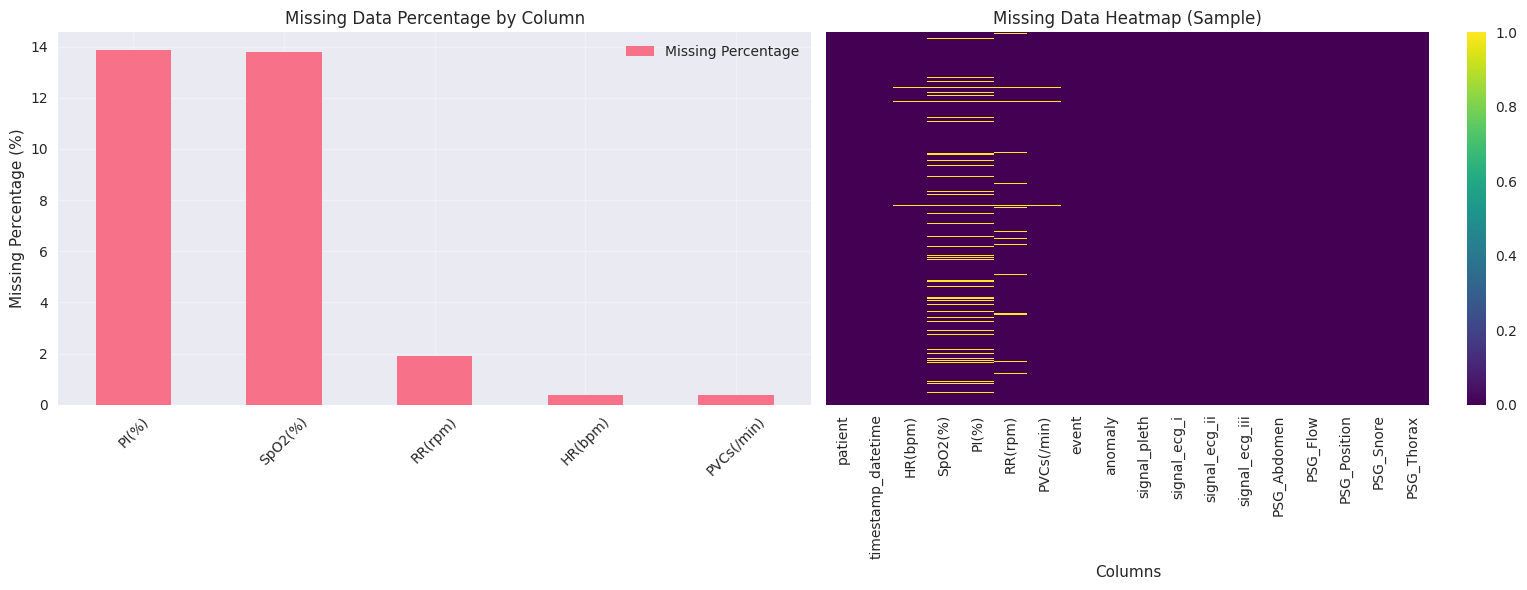

In [7]:
# Calculate missing data percentages
missing_data = dataset.isnull().sum()
missing_percentage = (missing_data / len(dataset)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Percentage', ascending=False)

print("Missing Data Summary:")
print(missing_summary)

# Plot missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of missing percentages
missing_summary[missing_summary['Missing Percentage'] > 0].plot(kind='bar', 
                                                                y='Missing Percentage', 
                                                                ax=axes[0])
axes[0].set_title('Missing Data Percentage by Column')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Missing data heatmap (sample of data)
sample_data = dataset.sample(min(1000, len(dataset)))  # Sample for visualization
sns.heatmap(sample_data.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Data Heatmap (Sample)')
axes[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()

In [8]:
# Missing data patterns per patient
missing_per_patient = dataset.groupby('patient').apply(lambda x: x.isnull().sum())
missing_percentage_per_patient = dataset.groupby('patient').apply(lambda x: (x.isnull().sum() / len(x)) * 100)

print("Missing data patterns per patient (first 10 patients):")
print(missing_percentage_per_patient.head(10))

Missing data patterns per patient (first 10 patients):
         patient  timestamp_datetime   HR(bpm)    SpO2(%)      PI(%)  \
patient                                                                
1            0.0                 0.0  0.003972   8.328700   8.459766   
10           0.0                 0.0  5.845389  17.787033  17.899070   
11           0.0                 0.0  0.003289  22.088816  22.250000   
12           0.0                 0.0  0.003317   0.006634   0.006634   
13           0.0                 0.0  0.005876   1.912681   2.030203   
14           0.0                 0.0  0.002709   2.597508   2.684182   
15           0.0                 0.0  0.193324  19.054523  19.060565   
16           0.0                 0.0  0.046354  11.931397  12.067367   
17           0.0                 0.0  0.003450  65.729465  65.763963   
18           0.0                 0.0  0.002787  37.310105  37.368641   

          RR(rpm)  PVCs(/min)  event  anomaly  signal_pleth  signal_ecg_i  \
pat

## 4. Temporal Analysis

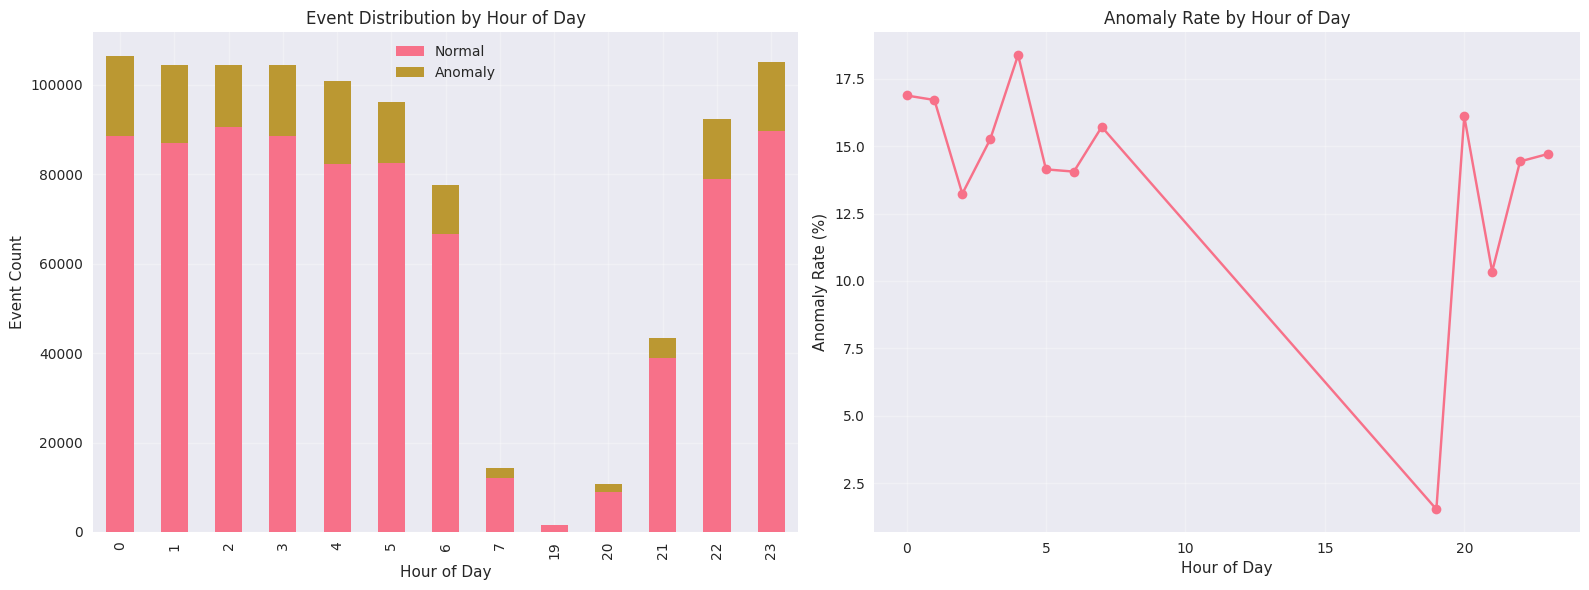

In [9]:
# Temporal patterns (if timestamp is available)
if 'timestamp_datetime' in dataset.columns:
    dataset['hour'] = pd.to_datetime(dataset['timestamp_datetime']).dt.hour
    dataset['day_of_week'] = pd.to_datetime(dataset['timestamp_datetime']).dt.dayofweek
    
    # Events by hour of day
    hourly_events = dataset.groupby(['hour', 'anomaly']).size().unstack(fill_value=0)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Events by hour
    hourly_events.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title('Event Distribution by Hour of Day')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Event Count')
    axes[0].legend(['Normal', 'Anomaly'])
    axes[0].grid(True, alpha=0.3)
    
    # Anomaly rate by hour
    hourly_anomaly_rate = dataset.groupby('hour')['anomaly'].mean() * 100
    axes[1].plot(hourly_anomaly_rate.index, hourly_anomaly_rate.values, marker='o')
    axes[1].set_title('Anomaly Rate by Hour of Day')
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('Anomaly Rate (%)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 5. Summary Statistics

In [10]:
# Overall summary statistics
print("=" * 50)
print("BASIC STATISTICS SUMMARY")
print("=" * 50)
print(f"Total Patients: {n_patients}")
print(f"Total Records: {total_records:,}")
print(f"Average Recording Duration: {patient_durations['duration_hours'].mean():.1f} hours")
print(f"Min Recording Duration: {patient_durations['duration_hours'].min():.1f} hours")
print(f"Max Recording Duration: {patient_durations['duration_hours'].max():.1f} hours")
print(f"Overall Anomaly Rate: {dataset['anomaly'].mean() * 100:.1f}%")
print(f"Most Common Event: {dataset['event'].value_counts().index[0]}")
print(f"Least Common Event: {dataset['event'].value_counts().index[-1]}")
print(f"Columns with Missing Data: {len(missing_summary[missing_summary['Missing Percentage'] > 0])}")
print(f"Max Missing Data Rate: {missing_summary['Missing Percentage'].max():.2f}%")

BASIC STATISTICS SUMMARY
Total Patients: 30
Total Records: 961,357
Average Recording Duration: 8.9 hours
Min Recording Duration: 4.1 hours
Max Recording Duration: 11.9 hours
Overall Anomaly Rate: 15.1%
Most Common Event: NONE
Least Common Event: APNEA-CENTRAL
Columns with Missing Data: 5
Max Missing Data Rate: 13.86%


## Conclusions

Key findings from basic statistics analysis:

1. **Patient Coverage**: [Summary of patient count and recording durations]
2. **Event Distribution**: [Summary of event patterns across patients]
3. **Data Quality**: [Summary of missing data patterns]
4. **Temporal Patterns**: [Summary of any time-based patterns]

**Next Steps**: 
- Proceed to class distribution analysis
- Investigate signal quality patterns
- Analyze label alignment and consistency